# Part 2: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("cleaned kpop data.csv")
df.head()

,fav_grp,popular,reason,start_time,gender_pref,daily_music_hr,watch_MV,daily_watch_hr,obsessed,news_medium,...,yr_spend,money_src,concerts,crazy_thing,age,country,career,gender,num_grp_like,bts_vs_others
0,bts,its gaining popularity,other reasons,1.5,it's about music,5.0,yes,2.5,not sure,youtube,...,75,full-time job,yes,others (combinations of not studying/working a...,18,uk,full-time worker,female,1,bts
1,bts,its gaining popularity,many reasons,3.5,both,3.0,yes,2.5,yes,youtube,...,50,"others (gift, scholarship, etc)","i want to, but the k-pop groups don't come to ...",others (combinations of not studying/working a...,18,uk,student,female,1,bts
2,"bts,monsta x",its gaining popularity,many reasons,4.0,it's about music,3.0,yes,2.5,no,"social media (twitter, instagram)",...,75,"others (gift, scholarship, etc)",yes,nothing,18,other european countries,student,female,2,bts
3,bts,its gaining popularity,other reasons,3.5,both,5.0,yes,3.5,no,youtube,...,75,"others (gift, scholarship, etc)",yes,nothing,24,usa,student,female,1,bts
4,bts,yes,other reasons,3.5,male,5.0,yes,2.5,not sure,youtube,...,150,from parents,"i want to, but the k-pop groups don't come to ...",nothing,18,usa,student,female,1,bts


### Analyzing Numerical Variables

In [13]:
df.describe()

,start_time,daily_music_hr,daily_watch_hr,yr_spend,age,num_grp_like
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.210417,4.368750,1.954167,85.895833,18.212500,2.033333
std,1.642944,2.146434,1.054966,118.231076,3.488272,2.968265
min,1.000000,0.500000,1.000000,0.000000,12.000000,1.000000
25%,1.500000,3.000000,1.000000,50.000000,18.000000,1.000000
50%,3.500000,5.000000,2.500000,50.000000,18.000000,1.000000
75%,4.000000,5.000000,2.500000,75.000000,18.000000,2.000000
max,18.000000,10.000000,4.500000,500.000000,29.000000,37.000000


In [14]:
df_continuous = df[['start_time','daily_music_hr','daily_watch_hr','yr_spend','age','num_grp_like']]

#### Histogram of start time column (kinda right-skewed)

<Axes: >

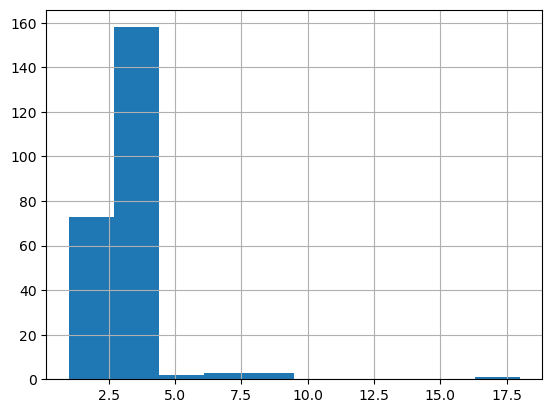

In [23]:
df.start_time.hist()

#### Histogram of daily music hour column (normal distribution)

<Axes: >

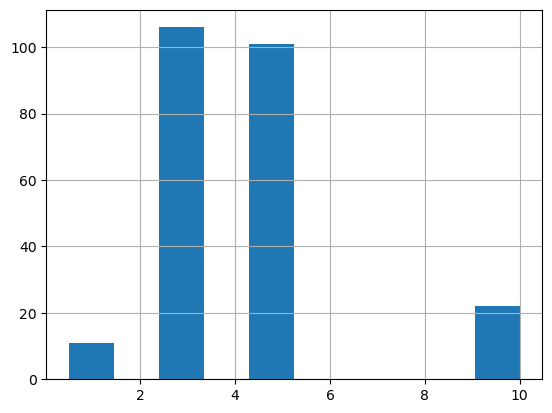

In [18]:
df.daily_music_hr.hist()

#### Histogram of daily MV hour column (right skewed)

<Axes: >

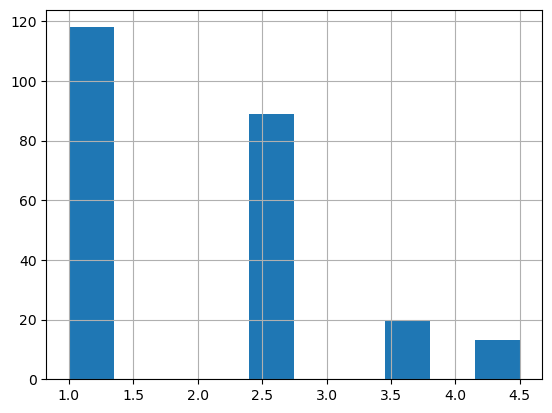

In [20]:
df['daily_watch_hr'].hist()

 #### Histogram of yearly merchandise spending column (close to normal)

<Axes: >

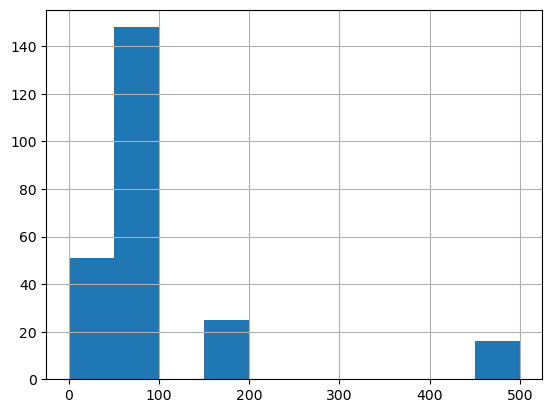

In [21]:
df['yr_spend'].hist()

#### Histogram of age (normal)

<Axes: >

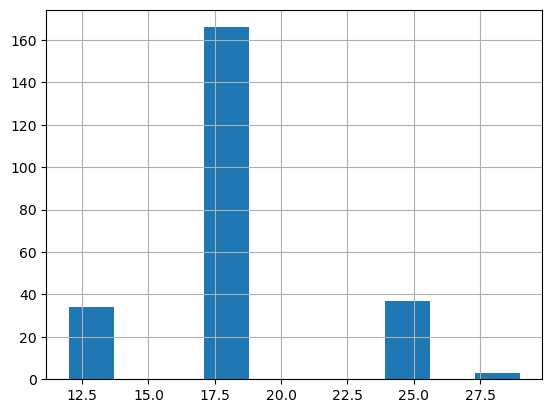

In [22]:
df['age'].hist()

#### Histogram of number of like groups column (right skewed)

<Axes: >

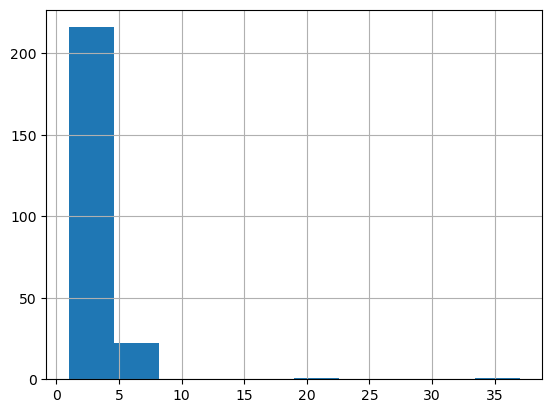

In [24]:
df['num_grp_like'].hist()

#### Checking boxplots to detect outliers

<Axes: >

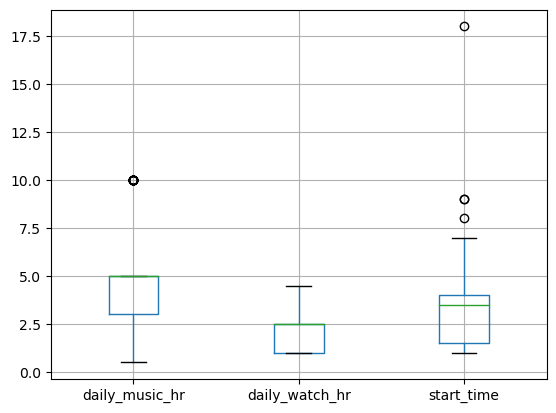

In [26]:
# start_time has some outliers
df.boxplot(column=['daily_music_hr','daily_watch_hr','start_time'])

<Axes: >

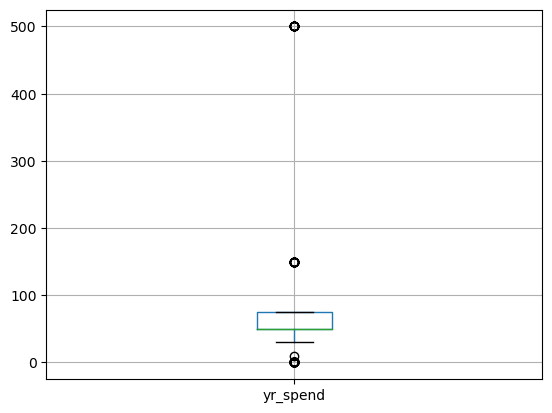

In [27]:
# yr_spend has some outliers
df.boxplot(column = 'yr_spend')

<Axes: >

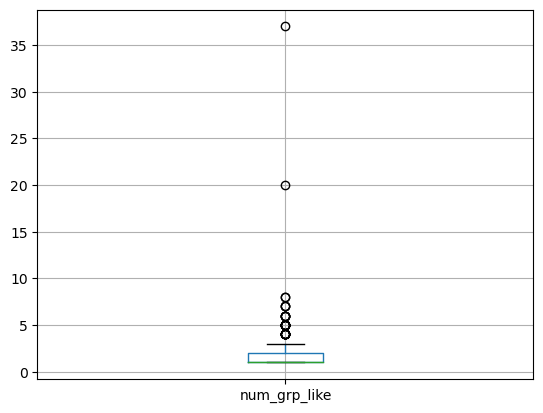

In [28]:
# num_grp_like has a lot of outliers
df.boxplot(column='num_grp_like')

#### Remove outliers and check the distribution again

<Axes: >

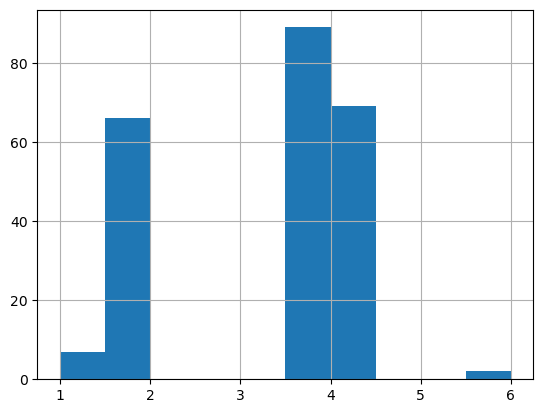

In [29]:
df_start_time_no_outlier = df[df['start_time'] < 7]
df_start_time_no_outlier['start_time'].hist()

#### Checking correlation among the continuous variables

In [30]:
df[['start_time','daily_music_hr','daily_watch_hr','yr_spend','age','num_grp_like']].corr()

,start_time,daily_music_hr,daily_watch_hr,yr_spend,age,num_grp_like
start_time,1.000000,0.112275,0.021882,0.145014,0.111168,0.047890
daily_music_hr,0.112275,1.000000,0.152544,0.221685,-0.080921,0.191467
daily_watch_hr,0.021882,0.152544,1.000000,0.093754,-0.121273,0.160830
yr_spend,0.145014,0.221685,0.093754,1.000000,0.010443,-0.009862
age,0.111168,-0.080921,-0.121273,0.010443,1.000000,0.017498
num_grp_like,0.047890,0.191467,0.160830,-0.009862,0.017498,1.000000


<Axes: >

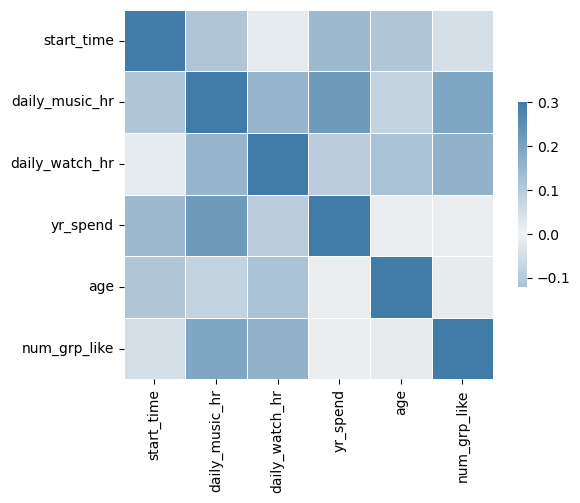

In [31]:
cmap = sns.diverging_palette(600, 600, as_cmap=True)
sns.heatmap(df[['start_time','daily_music_hr','daily_watch_hr','yr_spend','age','num_grp_like']].corr(),
           cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink":.5})

#### From the correlation above, we can see these relationships:

#### 1. Number of years they listened to K-Pop is positively correlated with number of hours they listen to K-Pop, money they spend on merchandise, and age.
#### 2. The number of hours K-Pop fans spend on watching K-Pop youtube music videos is positively correlated with the number of hours they listen to K-Pop music.
#### 3. The more time they spend on listening to K-Pop, the more money they spend on purchasing  K-Pop merchandise.
#### 4. The more K-Pop youtube videos they watch and the more K-Pop they listen, the more groups they like.
#### 5. The youger they are, the more time they spend on listening to K-Pop and watching K-Pop videos.
#### 6. Age has nothing to do with how much money they spend on purchasing K-Pop merchandise per year.

### Analyzing Categorical Variables

In [32]:
df.columns

Index(['fav_grp', 'popular', 'reason', 'start_time', 'gender_pref',
       'daily_music_hr', 'watch_MV', 'daily_watch_hr', 'obsessed',
       'news_medium', 'pursuit', 'taken_time', 'affect_life', 'pos_effects',
       'yr_spend', 'money_src', 'concerts', 'crazy_thing', 'age', 'country',
       'career', 'gender', 'num_grp_like', 'bts_vs_others'],
      dtype='object')

In [34]:
df_categorical = df[['fav_grp', 'popular', 'reason', 'gender_pref', 'obsessed', 
                     'news_medium', 'pursuit','affect_life', 'pos_effects', 
                     'money_src', 'concerts', 'crazy_thing', 'country', 'career', 
                     'gender', 'bts_vs_others']]

#### Bar Charts

graph for fav_grp: total = 15


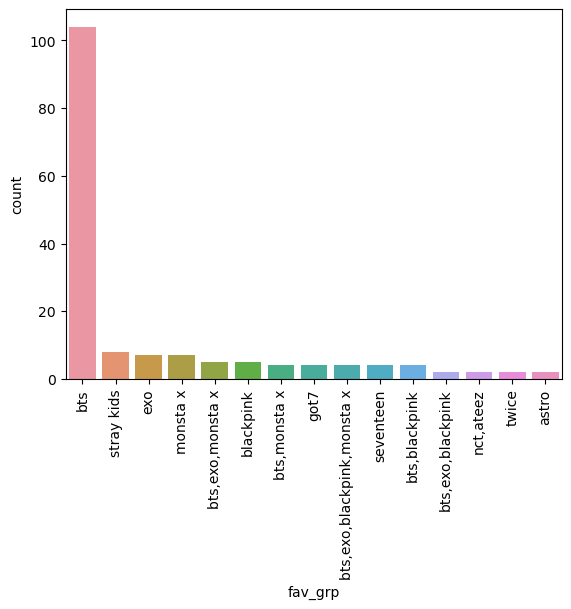

graph for popular: total = 4


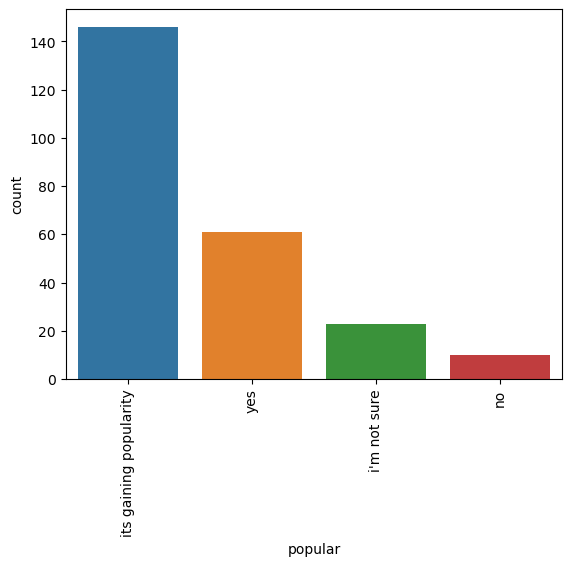

graph for reason: total = 3


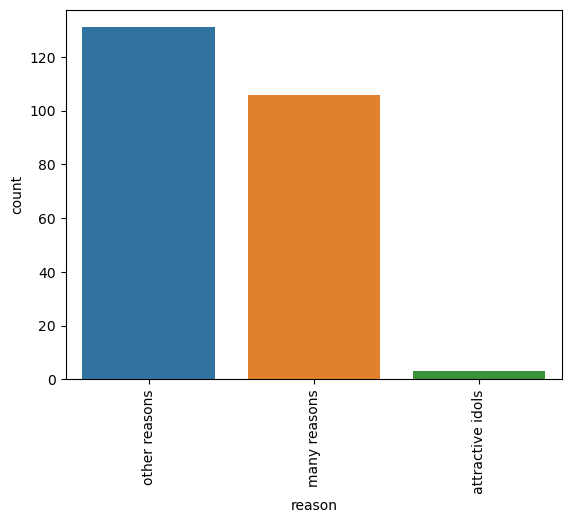

graph for gender_pref: total = 4


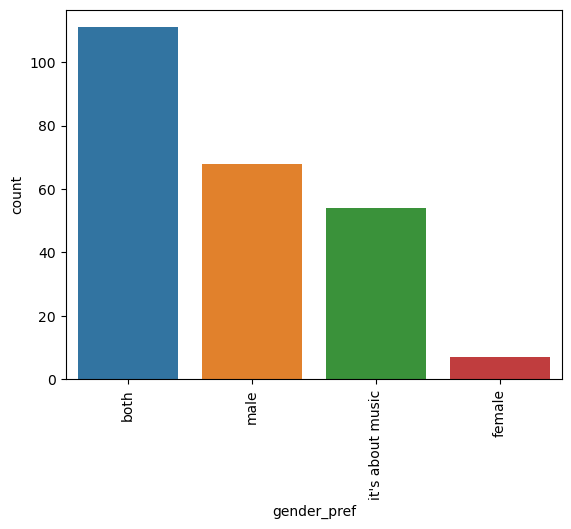

graph for obsessed: total = 3


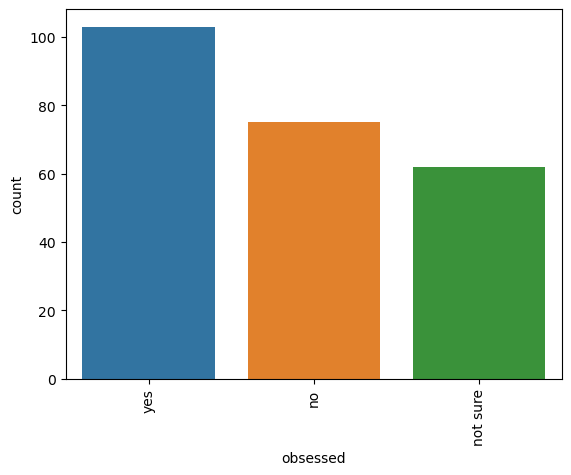

graph for news_medium: total = 3


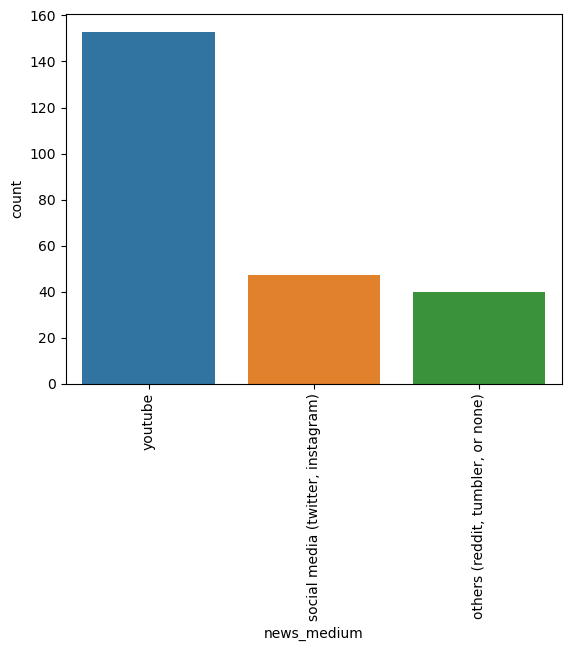

graph for pursuit: total = 6


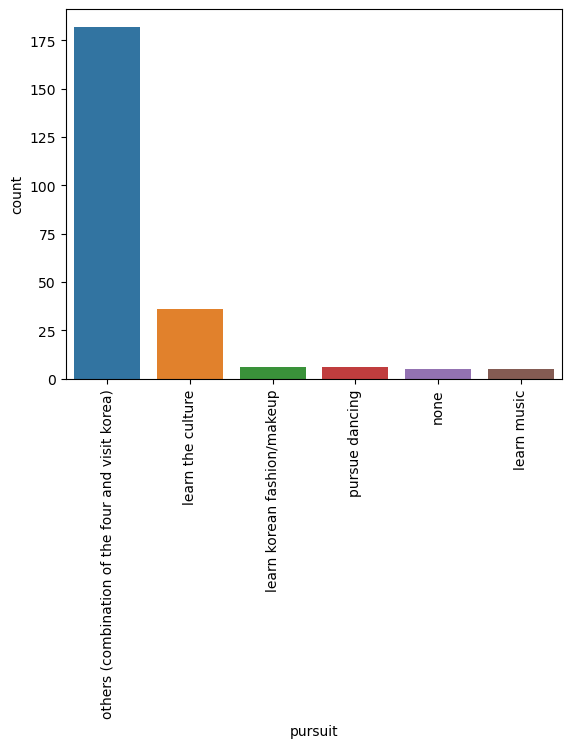

graph for affect_life: total = 5


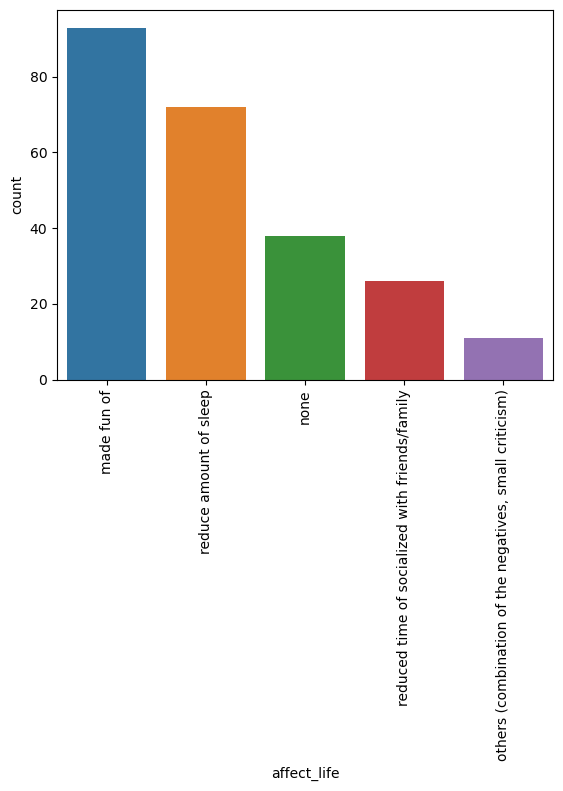

graph for pos_effects: total = 4


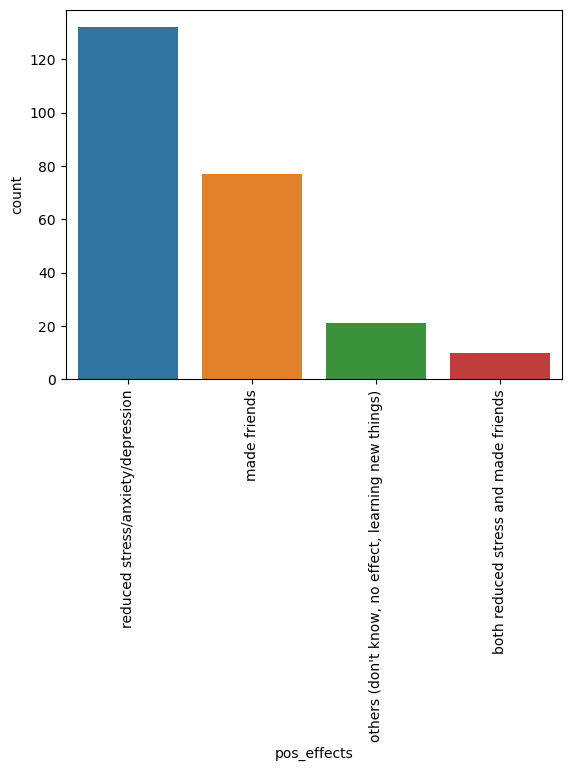

graph for money_src: total = 4


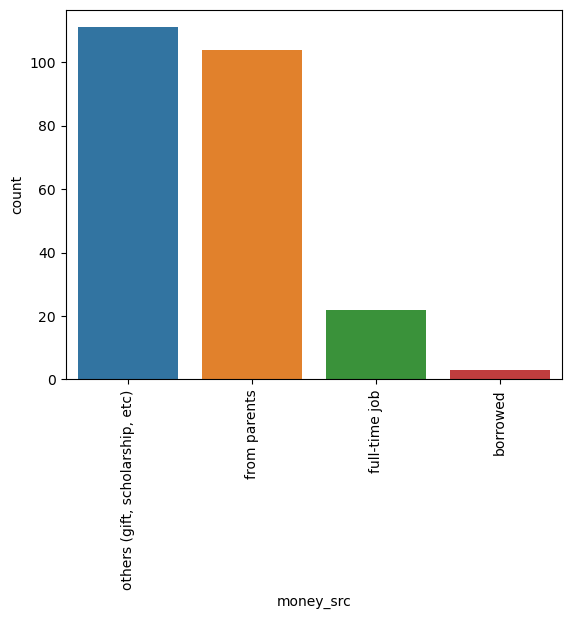

graph for concerts: total = 3


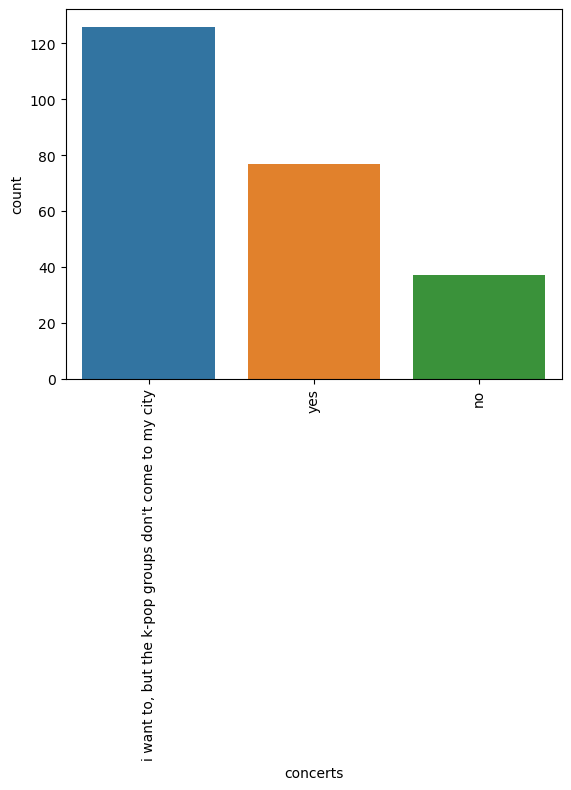

graph for crazy_thing: total = 3


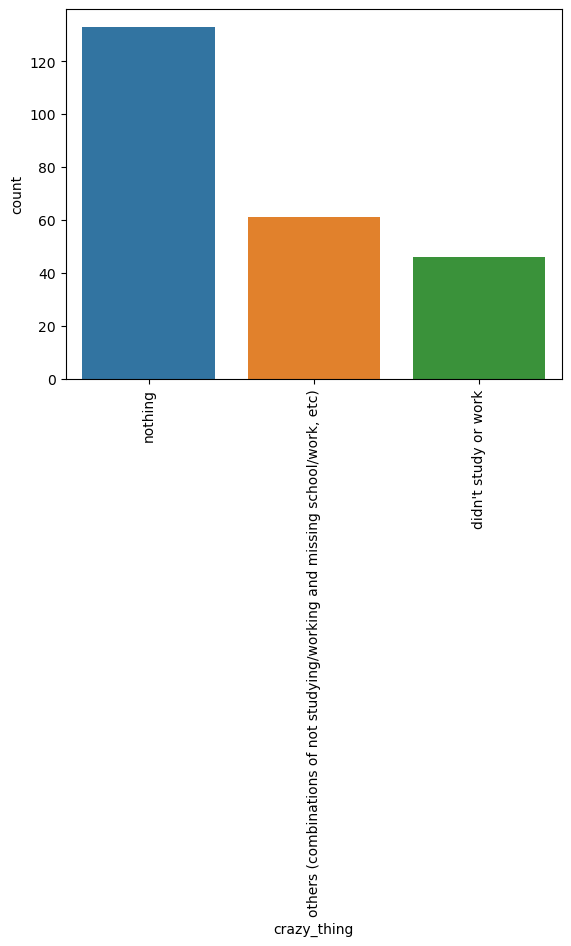

graph for country: total = 10


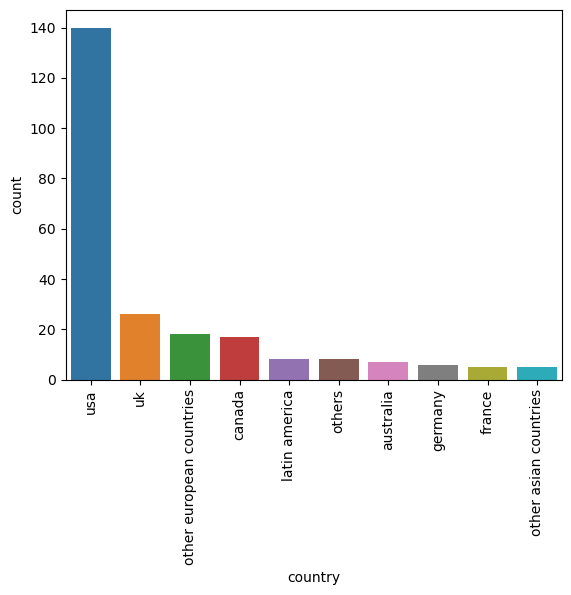

graph for career: total = 3


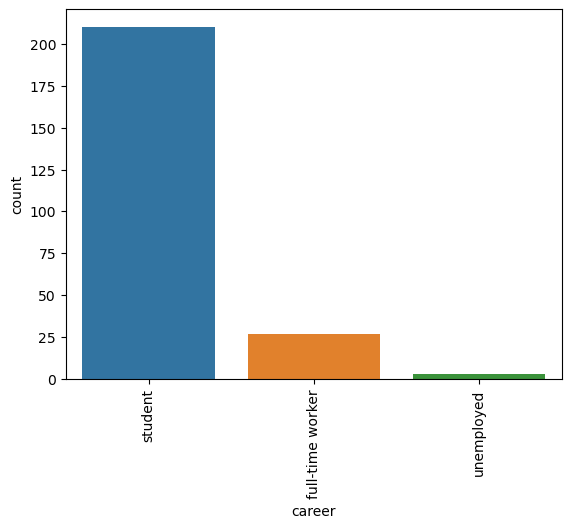

graph for gender: total = 3


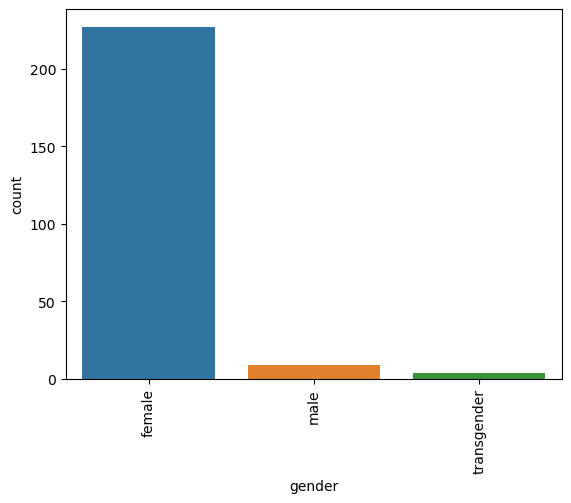

graph for bts_vs_others: total = 2


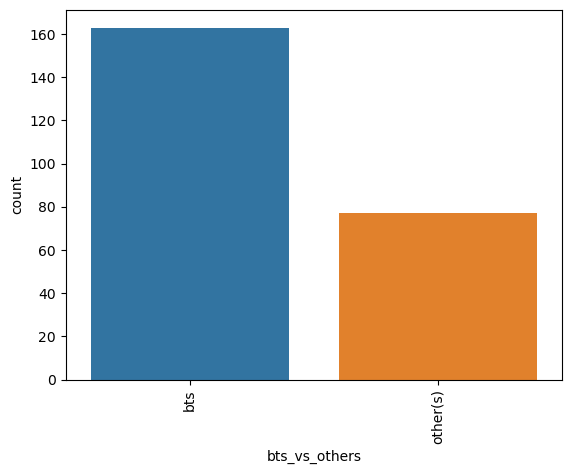

In [35]:
for i in df_categorical.columns:
    num = df_categorical[i].value_counts()[:15]
    print("graph for %s: total = %d" % (i, len(num)))
    chart = sns.barplot(x=num.index,y=num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

#### Pivot Tables

##### Relationship between listening/watching K-Pop and positive effects

In [36]:
pd.pivot_table(df, index = "pos_effects",
               values = ['daily_watch_hr','daily_music_hr']).sort_values('daily_watch_hr',ascending=False)

,daily_music_hr,daily_watch_hr
pos_effects,,
both reduced stress and made friends,4.650000,2.650000
reduced stress/anxiety/depression,4.473485,1.988636
made friends,4.012987,1.837662
"others (don't know, no effect, learning new things)",4.880952,1.833333


 ##### Relationship between listening/watching K-Pop and obsession

In [38]:
pd.pivot_table(df, index = "obsessed",
              values = ['daily_watch_hr','daily_music_hr']).sort_values('daily_watch_hr',ascending=False)

,daily_music_hr,daily_watch_hr
obsessed,,
not sure,4.080645,2.201613
yes,4.762136,2.087379
no,4.066667,1.566667


##### Relationship between going to concert and money they spend on K-Pop merchandise

In [39]:
pd.pivot_table(df, index = "concerts", values = "yr_spend")

,yr_spend
concerts,
"i want to, but the k-pop groups don't come to my city",66.388889
no,53.378378
yes,133.441558
